In [1]:
# talibのインストール
# conda install -c conda-forge ta-lib

### 必要なライブラリのインポート
- 標準ライブラリ(os, sys, time)
- サードパーティライブラリ(numpy, pandas)
- teamライブラリ
- 個人ライブラリ
- abc順
- https://peps.python.org/pep-0008/

In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import talib as ta
import yfinance as yf
import warnings

# データフレームの表示方法
pd.set_option('display.max_columns', None)#列数
pd.set_option('display.max_rows', 5)#行数

# waring(警告)の非表示
warnings.simplefilter('ignore')

## 問1：Ta-libを使用して、簡単にテクニカルを実装しよう

In [2]:
# 1-1　株価取得
ticker = '^N225'
start = '2020-01-01'
end = '2023-04-01'

df = yf.download(ticker, start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-27,27482.390625,27543.480469,27359.720703,27476.869141,27476.869141,57400000
2023-03-28,27573.820312,27603.449219,27432.759766,27518.250000,27518.250000,66400000
2023-03-29,27549.369141,27897.720703,27505.480469,27883.779297,27883.779297,83800000
2023-03-30,27827.890625,27876.380859,27630.550781,27782.929688,27782.929688,82000000
2023-03-31,28009.220703,28124.619141,27986.619141,28041.480469,28041.480469,91100000


### 移動平均

In [3]:
# 1-2 移動平均のカラムを作成
span1 = 25
span2 = 50

#　単純移動平均カラム
df['sma_25'] = ta.SMA(df['Adj Close'], timeperiod=span1)
df['sma_50'] = ta.SMA(df['Adj Close'], timeperiod=span2)

# 指数移動平均カラム
df['ema_25'] = ta.EMA(df['Adj Close'], timeperiod=span1)
df['ema_50'] = ta.EMA(df['Adj Close'], timeperiod=span2)

# 加重移動平均カラム
df['wma_25'] = ta.WMA(df['Adj Close'], timeperiod=span1)
df['wma_50'] = ta.WMA(df['Adj Close'], timeperiod=span2)
df.iloc[-5:,4:] #行：後ろから5行、列：4列目以降全て表示

,Adj Close,Volume,sma_25,sma_50,ema_25,ema_50,wma_25,wma_50
Date,,,,,,,,
2023-03-27,27476.869141,57400000,27598.779922,27392.672969,27511.457679,27441.312133,27570.084105,27551.353925
2023-03-28,27518.250000,66400000,27598.984688,27420.647578,27511.980165,27444.329304,27563.889495,27556.278514
2023-03-29,27883.779297,83800000,27613.058281,27461.876758,27540.580098,27461.562637,27585.796773,27574.440542
2023-03-30,27782.929688,82000000,27625.451484,27494.761758,27559.222374,27474.165267,27598.863804,27587.030853
2023-03-31,28041.480469,91100000,27662.937891,27519.768984,27596.319151,27496.412922,27630.866034,27608.470803


### ボリンジャーバンド

In [4]:
# 1-3
# 単純移動平均におけるボリンジャーバンド±2σの作成
b_span = 20 # 移動平均日数
b_std = 2 # 標準偏差 * n
matype = 0 # 単純 

# upper:2σ、lower:-2σ
df['upper'], df['middle'], df['lower'] = ta.BBANDS(df['Adj Close'], timeperiod=b_span, nbdevup=b_std, nbdevdn=b_std, matype=matype)
df.iloc[-5:,8:]

,ema_25,ema_50,wma_25,wma_50,upper,middle,lower
Date,,,,,,,
2023-03-27,27511.457679,27441.312133,27570.084105,27551.353925,28582.422695,27644.676367,26706.930040
2023-03-28,27511.980165,27444.329304,27563.889495,27556.278514,28583.592584,27649.390820,26715.189057
2023-03-29,27540.580098,27461.562637,27585.796773,27574.440542,28605.909063,27671.301758,26736.694453
2023-03-30,27559.222374,27474.165267,27598.863804,27587.030853,28617.618229,27684.621777,26751.625326
2023-03-31,27596.319151,27496.412922,27630.866034,27608.470803,28653.084870,27711.752344,26770.419818


### RSI

In [5]:
# 1-4
# 14日RSIカラム作成
rsi_span = 14 #日数
df["rsi"] = ta.RSI(df["Adj Close"], timeperiod=rsi_span)
df.iloc[-5:,9:]

,ema_50,wma_25,wma_50,upper,middle,lower,rsi
Date,,,,,,,
2023-03-27,27441.312133,27570.084105,27551.353925,28582.422695,27644.676367,26706.930040,49.434205
2023-03-28,27444.329304,27563.889495,27556.278514,28583.592584,27649.390820,26715.189057,50.186577
2023-03-29,27461.562637,27585.796773,27574.440542,28605.909063,27671.301758,26736.694453,56.363012
2023-03-30,27474.165267,27598.863804,27587.030853,28617.618229,27684.621777,26751.625326,54.360337
2023-03-31,27496.412922,27630.866034,27608.470803,28653.084870,27711.752344,26770.419818,58.437638


### MACD

In [6]:
# 1-5
# MACDカラム作成
macd_first = 12 # 先行線日数
macd_slow = 26 # 遅行線日数線
macd_signal = 9 # シグナル線日数

df["macd"], df["macd_signal"], df["macd_hist"] = ta.MACD(df["Adj Close"], fastperiod=macd_first, slowperiod=macd_slow, signalperiod=macd_signal)
df.iloc[-5:,12:]

,upper,middle,lower,rsi,macd,macd_signal,macd_hist
Date,,,,,,,
2023-03-27,28582.422695,27644.676367,26706.930040,49.434205,-41.991322,14.464984,-56.456306
2023-03-28,28583.592584,27649.390820,26715.189057,50.186577,-34.859798,4.600028,-39.459826
2023-03-29,28605.909063,27671.301758,26736.694453,56.363012,0.283873,3.736797,-3.452924
2023-03-30,28617.618229,27684.621777,26751.625326,54.360337,19.769870,6.943411,12.826459
2023-03-31,28653.084870,27711.752344,26770.419818,58.437638,55.436513,16.642032,38.794481


### ストキャスティクス

In [7]:
# 1-6
# ストキャスティクスカラム作成

sto_first = 14 # 先行線日数
sto_slow_d = 3 # 遅行線_d日数
sto_slow_k = 3 # 遅行線_k日数

df["stock_slowk"], df["stock_slowd"] = ta.STOCH(df["High"], df["Low"], df["Adj Close"], fastk_period=sto_first, slowk_period=sto_slow_k, slowd_period=sto_slow_d)
df.iloc[-5:,14:]

,lower,rsi,macd,macd_signal,macd_hist,stock_slowk,stock_slowd
Date,,,,,,,
2023-03-27,26706.930040,49.434205,-41.991322,14.464984,-56.456306,37.791264,35.359039
2023-03-28,26715.189057,50.186577,-34.859798,4.600028,-39.459826,39.355596,38.258472
2023-03-29,26736.694453,56.363012,0.283873,3.736797,-3.452924,47.261722,41.469527
2023-03-30,26751.625326,54.360337,19.769870,6.943411,12.826459,55.277283,47.298200
2023-03-31,26770.419818,58.437638,55.436513,16.642032,38.794481,72.712448,58.417151


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_25,sma_50,ema_25,ema_50,wma_25,wma_50,upper,middle,lower,rsi,macd,macd_signal,macd_hist,stock_slowk,stock_slowd
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,27827.890625,27876.380859,27630.550781,27782.929688,27782.929688,82000000,27625.451484,27494.761758,27559.222374,27474.165267,27598.863804,27587.030853,28617.618229,27684.621777,26751.625326,54.360337,19.769870,6.943411,12.826459,55.277283,47.298200
2023-03-31,28009.220703,28124.619141,27986.619141,28041.480469,28041.480469,91100000,27662.937891,27519.768984,27596.319151,27496.412922,27630.866034,27608.470803,28653.084870,27711.752344,26770.419818,58.437638,55.436513,16.642032,38.794481,72.712448,58.417151


## 問2：テクニカルのシグナルフラグを実装しよう

### 移動平均シグナル

In [9]:
# 2-1
# np.where(条件、条件達成時の値、条件未達成の値)
# 単純移動平均のゴールデンクロスシグナル
df['sma_sig'] = np.where((df['sma_25'] > df['sma_50']) & (df['sma_25'].shift() < df['sma_50'].shift()), 1, 0)

# 指数移動平均のゴールデンクロスシグナル
df['ema_sig'] = np.where((df['ema_25'] > df['ema_50']) & (df['ema_25'].shift() < df['ema_50'].shift()), 1, 0)

# 加重移動平均のゴールデンクロスシグナル
df['wma_sig'] = np.where((df['wma_25'] > df['wma_50']) & (df['wma_25'].shift() < df['wma_50'].shift()), 1, 0)
df.iloc[-3:,17:]

,macd_signal,macd_hist,stock_slowk,stock_slowd,sma_sig,ema_sig,wma_sig
Date,,,,,,,
2023-03-29,3.736797,-3.452924,47.261722,41.469527,0,0,0
2023-03-30,6.943411,12.826459,55.277283,47.298200,0,0,0
2023-03-31,16.642032,38.794481,72.712448,58.417151,0,0,0


### ボリンジャーバンドシグナル

In [10]:
# 2-2
# ボリンジャーバンド-2σを下回って終わった場合のシグナル
df['band_sig'] = np.where(df['Adj Close'] < df['lower'], 1, 0)
df.iloc[-3:,18:]

,macd_hist,stock_slowk,stock_slowd,sma_sig,ema_sig,wma_sig,band_sig
Date,,,,,,,
2023-03-29,-3.452924,47.261722,41.469527,0,0,0,0
2023-03-30,12.826459,55.277283,47.298200,0,0,0,0
2023-03-31,38.794481,72.712448,58.417151,0,0,0,0


### RSIシグナル

In [12]:
# 2-3
# RSIが30以下で終わった場合のシグナル（前日が30以上で、当日30以下の場合）
rsi_day = 30
df['rsi_sig'] = np.where((df['rsi'] < rsi_day) & (df['rsi'].shift() > rsi_day), 1, 0)
df.iloc[-3:,19:]

,stock_slowk,stock_slowd,sma_sig,ema_sig,wma_sig,band_sig,rsi_sig
Date,,,,,,,
2023-03-29,47.261722,41.469527,0,0,0,0,0
2023-03-30,55.277283,47.298200,0,0,0,0,0
2023-03-31,72.712448,58.417151,0,0,0,0,0


### macdシグナル

In [13]:
# 2-4
# macdとmacd_signalのゴールデンクロスした場合
df['macd_sig'] = np.where((df['macd'] > df['macd_signal']) & (df['macd'].shift() < df['macd_signal'].shift()), 1, 0)
df.iloc[-3:,20:]

,stock_slowd,sma_sig,ema_sig,wma_sig,band_sig,rsi_sig,macd_sig
Date,,,,,,,
2023-03-29,41.469527,0,0,0,0,0,0
2023-03-30,47.298200,0,0,0,0,0,1
2023-03-31,58.417151,0,0,0,0,0,0


### ストキャスティクスシグナル

In [14]:
# 2-5
# ストキャスティクスシグナル
df['stock_sig'] = np.where((df["stock_slowk"] > 80) & (df["stock_slowd"] > 80) & (df["stock_slowk"].shift() < 80) & (df["stock_slowd"].shift() < 80), 1, 0)
df.iloc[-3:,21:]

,sma_sig,ema_sig,wma_sig,band_sig,rsi_sig,macd_sig,stock_sig
Date,,,,,,,
2023-03-29,0,0,0,0,0,0,0
2023-03-30,0,0,0,0,0,1,0
2023-03-31,0,0,0,0,0,0,0


### 様々なローソク足シグナル
- ローソク足の種類は数多く存在するため、代表的なもののみ確認する。

https://qiita.com/Miku_F/items/7ca38f495f907159dfdf

In [15]:
# 2-6　ローソク足シグナル
# 100:上昇トレンド中に検出された場合、-100:下降トレンド中に検出された場合、　0:該当なし 
df['doji'] = ta.CDLDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
df['engulfing'] = ta.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])
df['harami'] = ta.CDLHARAMI(df['Open'], df['High'], df['Low'], df['Adj Close'])
df['hammer'] = ta.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
df.iloc[-3:,24:]

,band_sig,rsi_sig,macd_sig,stock_sig,doji,engulfing,harami,hammer
Date,,,,,,,,
2023-03-29,0,0,0,0,0,0,0,0
2023-03-30,0,0,1,0,0,0,-100,0
2023-03-31,0,0,0,0,0,0,0,0


### ローソク足シグナル発生時テーブルの抽出

In [16]:
# 2-7 
before_day = -3 #シグナル発生日から3日前まで表示するため

#dojiが発生した場合：100
doji_sig = df[df["doji"]==100] # signal発生データフレーム取得
doji = df.loc[doji_sig.index[-1] + pd.to_timedelta(before_day, "d"):doji_sig.index[-1]]

#engulfingが発生した場合：-100(下落トレンド時)
engulfing_sig = df[df["engulfing"]==-100]
engulfing = df.loc[engulfing_sig.index[-1] + pd.to_timedelta(before_day, "d"):engulfing_sig.index[-1]]

#haramiが発生した場合：-100(下落トレンド時)
harami_sig = df[df["harami"]==-100]
harami = df.loc[harami_sig.index[-1] + pd.to_timedelta(before_day, "d"):harami_sig.index[-1]]

#hammerが発生した場合：100
hammer_sig = df[df["hammer"]==100]
hammer = df.loc[hammer_sig.index[-1] + pd.to_timedelta(before_day, "d"):hammer_sig.index[-1]]

---
- ＜例＞dojiには何が格納されているか

In [17]:
# dojiが発生した日の取得
df[df["doji"]==100].index

DatetimeIndex(['2020-02-13', '2020-04-09', '2020-04-10', '2020-04-15',
               '2020-04-16', '2020-04-20', '2020-04-22', '2020-04-28',
               '2020-06-18', '2020-06-19', '2020-06-24', '2020-06-25',
               '2020-08-31', '2020-09-02', '2020-09-15', '2020-09-25',
               '2020-10-06', '2020-11-13', '2020-11-17', '2020-11-19',
               '2020-12-15', '2020-12-18', '2021-01-05', '2021-01-18',
               '2021-01-27', '2021-01-28', '2021-03-15', '2021-04-05',
               '2021-04-07', '2021-04-19', '2021-05-07', '2021-05-19',
               '2021-05-21', '2021-05-25', '2021-05-27', '2021-06-14',
               '2021-06-16', '2021-06-23', '2021-07-13', '2021-07-19',
               '2021-08-10', '2021-08-11', '2021-09-02', '2021-10-07',
               '2021-10-08', '2021-11-15', '2021-11-18', '2021-12-02',
               '2021-12-30', '2022-01-17', '2022-02-08', '2022-03-01',
               '2022-03-14', '2022-03-31', '2022-04-18', '2022-04-20',
      

In [22]:
# timestampの計算方法
df[df["doji"]==100].index[-1]

Timestamp('2023-03-27 00:00:00')

In [23]:
# timestampの計算方法
pd.to_timedelta(-3, "d")

Timedelta('-3 days +00:00:00')

In [24]:
# timestampの計算方法
df[df["doji"]==100].index[-1] + pd.to_timedelta(-3, "d")

Timestamp('2023-03-24 00:00:00')

In [25]:
# '2023-03-24' -> df[df["doji"]==100].index[-1] + pd.to_timedelta(-3, "d")
# '2023-03-27' -> df[df["doji"]==100].index[-1]
df.loc['2023-03-24':'2023-03-27']

,Open,High,Low,Close,Adj Close,Volume,sma_25,sma_50,ema_25,ema_50,wma_25,wma_50,upper,middle,lower,rsi,macd,macd_signal,macd_hist,stock_slowk,stock_slowd,sma_sig,ema_sig,wma_sig,band_sig,rsi_sig,macd_sig,stock_sig,doji,engulfing,harami,hammer
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-03-24,27368.619141,27397.289062,27257.439453,27385.250000,27385.250000,59500000,27607.562734,27372.131992,27514.340057,27439.860827,27580.137458,27547.246585,28582.145323,27643.506934,26704.868545,47.813722,-46.269633,28.579061,-74.848694,37.628555,32.527379,0,0,0,0,0,0,0,100,0,-100,0
2023-03-27,27482.390625,27543.480469,27359.720703,27476.869141,27476.869141,57400000,27598.779922,27392.672969,27511.457679,27441.312133,27570.084105,27551.353925,28582.422695,27644.676367,26706.930040,49.434205,-41.991322,14.464984,-56.456306,37.791264,35.359039,0,0,0,0,0,0,0,100,0,0,0


---

### ローソク足シグナルの可視化

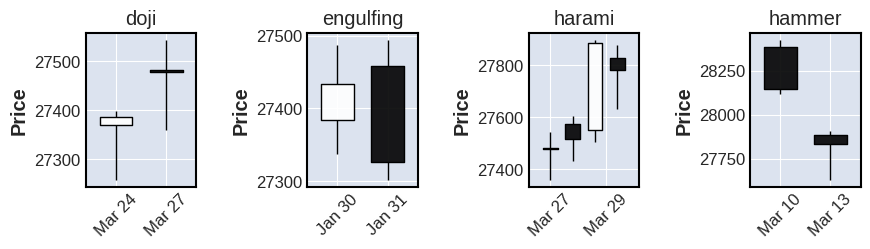

In [26]:
# figureオブジェクトを生成してローソク足の種類を確認
fig = mpf.figure(figsize=(10, 2))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

# mplfinanceのグラフ表記方法
mpf.plot(doji, type='candle', volume=False, ax=ax1)
mpf.plot(engulfing, type='candle', volume=False, ax=ax2)
mpf.plot(harami, type='candle', volume=False, ax=ax3)
mpf.plot(hammer, type='candle', volume=False, ax=ax4)

# title表示
ax1.set_title("doji")
ax2.set_title("engulfing")
ax3.set_title("harami")
ax4.set_title("hammer")

# 横方向の間隔を0.5に設定
plt.subplots_adjust(wspace=1)
# 表示
plt.show()

## 問3 シグナル後の株価上昇率を確認しよう
- 例：単純移動平均ゴールデンクロス
- 5日後に上昇しているのか確認

In [27]:
# 3-1
#① ゴールデンクロス発生時の終値をデータフレームに格納
df_sma = df[df["sma_sig"]==1][["Adj Close"]]

#② シグナル発生後の5営業日の終値カラムを取得
after_day = 5
price = []
# try exceptを利用し、データが存在しない場合は欠損値を取得するようにする。
for index in df[df["sma_sig"]==1].index:
    try:
        price.append(df.iloc[df.index.get_loc(index) + after_day]["Adj Close"])
    except:
        price.append(np.nan)
df_sma["after_Close"] = price

#③ 5営業日後の対数利益率カラムを取得
df_sma["log_profit"] = np.log(df_sma["after_Close"] / df_sma["Adj Close"])
df_sma

,Adj Close,after_Close,log_profit
Date,,,
2020-05-12,20366.480469,20433.449219,0.003283
2021-05-06,29331.369141,27448.009766,-0.066364
...,...,...,...
2022-11-16,28028.300781,28383.089844,0.012579
2023-02-14,27602.769531,27473.099609,-0.004709


---

In [49]:
# ② 5日後の終値を取得する方法
try:
    df.iloc[df.index.get_loc('2023-03-27') + 5]["Adj Close"]
except:
    None

---

In [37]:
# 3-2
# データフレームを活用し、5日後の上昇回数、上昇確率、平均上昇率を算出しましょう。
total_count = len(df_sma)
win_count = sum(df_sma["log_profit"] > 0)
win_percent = round(win_count / total_count * 100, 1)
win_rate_up = round(np.mean(df_sma["log_profit"]) * 100, 2)

print(f"{after_day}日後の上昇回数：{total_count}回中{win_count}回、上昇確率：{win_percent}%、平均上昇率：{win_rate_up}%だった")

5日後の上昇回数：10回中5回、上昇確率：50.0%、平均上昇率：-1.14%だった


## シグナル後5日間の株価変動確認（シグナル日別）

In [50]:
# 3-3 シグナル発生日から5日後までの1日毎の終値取得
index_day = df_sma.index
stock_list = []
after_day = 5

for index in index_day:
    price = []
    for day in range(after_day+1):
        try:
            price.append(df.iloc[df.index.get_loc(index) + day]["Adj Close"])
        except:
            price.append(np.nan)

    stock_list.append(price)
df_sma_days = pd.DataFrame(np.transpose(stock_list), columns=df_sma.index)
df_sma_days

Date,2020-05-12,2021-05-06,2021-06-25,2021-09-09,2021-11-22,2022-04-13,2022-06-14,2022-08-01,2022-11-16,2023-02-14
0,20366.480469,29331.369141,29066.179688,30008.189453,29774.109375,26843.490234,26629.859375,27993.349609,28028.300781,27602.769531
1,20267.050781,29357.820312,29048.019531,30381.839844,29302.660156,27172.000000,26326.160156,27594.730469,27930.570312,27501.859375
...,...,...,...,...,...,...,...,...,...,...
4,20133.730469,28147.509766,28707.039062,30511.710938,28283.919922,26985.089844,25771.220703,28175.869141,28115.740234,27531.939453
5,20433.449219,27448.009766,28783.279297,30323.339844,27821.759766,27217.849609,26246.310547,28249.240234,28383.089844,27473.099609


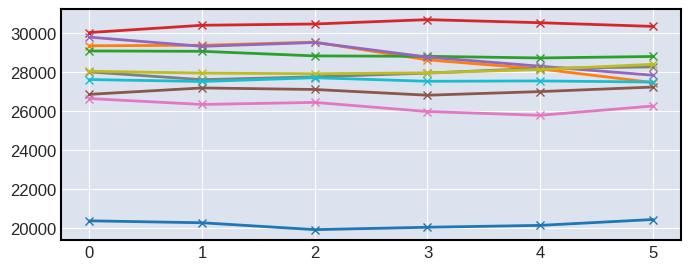

In [51]:
# 3-3 ダメな例：初期値の基準が合っていない
plt.figure(figsize=(8, 3))
plt.plot((df_sma_days), marker="x")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5])
plt.show()

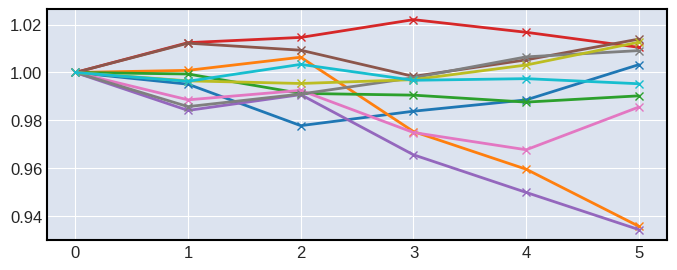

In [52]:
# 3-3　良い例
plt.figure(figsize=(8, 3))
plt.plot((df_sma_days / df_sma_days.iloc[0]), marker="x")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5])
plt.show()

## シグナル後5日間の株価変動確認（シグナル日平均）

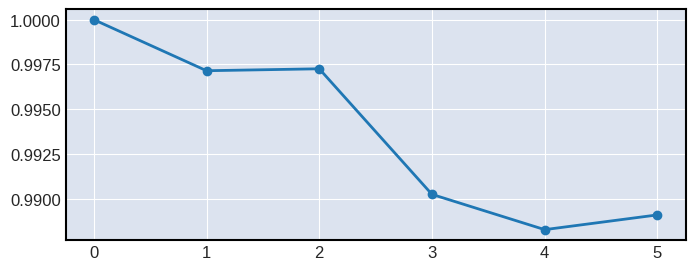

In [53]:
# 3-4 上記のグラフの平均を取得しグラフ化
plt.figure(figsize=(8, 3))
plt.plot(np.mean(df_sma_days / df_sma_days.iloc[0], axis=1), marker="o")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5])
plt.show()

残念ながら、移動平均線（25日線と50日線のゴールデンクロス）では,日経平均の上昇に寄与しなかった。

##　シグナルの中で日経平均に最適シグナルはどれか？

In [54]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sma_25',
       'sma_50', 'ema_25', 'ema_50', 'wma_25', 'wma_50', 'upper', 'middle',
       'lower', 'rsi', 'macd', 'macd_signal', 'macd_hist', 'stock_slowk',
       'stock_slowd', 'sma_sig', 'ema_sig', 'wma_sig', 'band_sig', 'rsi_sig',
       'macd_sig', 'stock_sig', 'doji', 'engulfing', 'harami', 'hammer'],
      dtype='object')

In [55]:
df.columns[-11:-4]

Index(['sma_sig', 'ema_sig', 'wma_sig', 'band_sig', 'rsi_sig', 'macd_sig',
       'stock_sig'],
      dtype='object')

In [56]:
# 3-5
# それぞれのシグナル発生5日後の利益率を格納する箱を用意
tech_comparison = []
# 5日後
after_day = 5

# シグナルはdf.columns[-11:-4]にはsma_sigからstock_sigまでが格納
for i in df.columns[-11:-4]:
    #　ゴールデンクロス発生時の終値をデータフレームに格納
    df_tech = df[df[i]==1][["Adj Close"]]

    # 5営業日後の株価を入れる箱を用意
    price = []
    for index in df[df[i]==1].index:
        try:
            price.append(df.iloc[df.index.get_loc(index) + after_day]["Adj Close"])
        except IndexError:
            price.append(np.nan)

    df_tech["after_Close"] = price

    # 5日後の対数利益率を格納
    df_tech["log_profit"] = np.log(df_tech["after_Close"] / df_tech["Adj Close"])
    # 
    tech_comparison.append({"{}".format(i):round(np.mean(df_tech["log_profit"]) * 100, 2)})
tech_comparison

[{'sma_sig': -1.14},
 {'ema_sig': 0.23},
 {'wma_sig': 0.94},
 {'band_sig': -0.12},
 {'rsi_sig': -2.05},
 {'macd_sig': -0.73},
 {'stock_sig': -0.63}]

### 単体テクニカルでなく、複数テクニカルを確認

In [57]:
#　3-6
#① シグナル発生時の終値をデータフレームに格納
df_band_doji = df[(df["band_sig"]==1)&(df["doji"]==100)][["Adj Close"]]

#② シグナル発生後の5営業日の終値カラムを取得
after_day = 5
price = []
for index in df_band_doji.index:
    try:
        price.append(df.iloc[df.index.get_loc(index) + after_day]["Adj Close"])
    except IndexError:
        price.append(np.nan)
df_band_doji["after_Close"] = price

#③ 5営業日後の対数利益率カラムを取得
df_band_doji["log_profit"] = np.log(df_band_doji["after_Close"] / df_band_doji["Adj Close"])

#④ データフレームを活用し、5日後の上昇回数、上昇確率、平均上昇率を算出しましょう。
total_count = len(df_band_doji)
win_count = sum(df_band_doji["log_profit"] > 0)
win_percent = round(win_count / total_count * 100, 1)
win_rate_up = round(np.mean(df_band_doji["log_profit"]) * 100, 2)

print(f"{after_day}日後の上昇回数：{total_count}回中{win_count}回、上昇確率：{win_percent}%、平均上昇率：{win_rate_up}%だった")

df_band_doji

5日後の上昇回数：4回中2回、上昇確率：50.0%、平均上昇率：1.05%だった


,Adj Close,after_Close,log_profit
Date,,,
2021-07-19,27652.740234,27581.660156,-0.002574
2021-12-02,27753.369141,28725.470703,0.034427
2022-09-27,26571.869141,26992.210938,0.015695
2022-12-23,26235.250000,26094.500000,-0.005379


##　問4 銘柄・テクニカル別の最適解を探求しよう。
- 例：単純移動平均ゴールデンクロス

### 関数化

In [58]:
# 4-1　前問でやったことを関数化する。

def sma_gc(ticker, start, end, short_day, long_day, after_day):
    #1 株価取得(1-1)
    df = yf.download(ticker, start, end)
    
    #2 単純移動平均カラム及びシグナルカラム作成(1-2、2-1)
    df[f"sma_{short_day}"] = ta.SMA(df["Adj Close"], timeperiod=short_day)
    df[f"sma_{long_day}"] = ta.SMA(df["Adj Close"], timeperiod=long_day)
    df['sma_sig'] = np.where((df[f"sma_{short_day}"] > df[f"sma_{long_day}"]) & (df[f"sma_{short_day}"].shift() < df[f"sma_{long_day}"].shift()), 1, 0)
    
    #3　単純移動平均がゴールデンクロスした日のデータテーブルを取得(3-1)
    df_sma = df[df["sma_sig"]==1][["Adj Close"]]
    
    #4 シグナル発生日から5日後までの経過日数毎の終値取得(3-1)
    price = []
    for index in df[df["sma_sig"]==1].index:
        try:
            price.append(df.iloc[df.index.get_loc(index) + after_day]["Adj Close"])
        except:
            price.append(np.nan)
    df_sma["after_Close"] = price
    
    #5 経過日数毎の対数利益率計算(3-1)
    df_sma["log_profit"] = np.log(df_sma["after_Close"] / df_sma["Adj Close"])

    #6 上昇回数、上昇確率、平均上昇率を算出(3-2)
    total_count = len(df_sma)
    win_count = sum(df_sma["log_profit"] > 0)
    win_percent = round(win_count / total_count * 100, 1)
    win_rate_up = round(np.mean(df_sma["log_profit"]) * 100, 2)
    
    # シグナル発生日から経過日数nまでの終値取得し、可視化(3-3、3-4)
    index_day = df_sma.index

    stock_list = []
    for index in index_day:
        price = []
        for day in range(after_day+1):
            try:
                price.append(df.iloc[df.index.get_loc(index) + day]["Adj Close"])
            except:
                price.append(np.nan)
        stock_list.append(price)
    df_sma_days = pd.DataFrame(np.transpose(stock_list), columns=df_sma.index)
    
    print(f"{ticker}におけるシグナル発生{after_day}日後の上昇回数：{total_count}回中{win_count}回、上昇確率：{win_percent}%、平均上昇率：{win_rate_up}%だった")
    
    plt.figure(figsize=(8, 3))
    plt.plot(np.mean(df_sma_days / df_sma_days.iloc[0], axis=1), marker="o")
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5])
    plt.show()
    
    return total_count, win_percent, win_rate_up

[*********************100%***********************]  1 of 1 completed
6758.Tにおけるシグナル発生5日後の上昇回数：8回中6回、上昇確率：75.0%、平均上昇率：2.01%だった


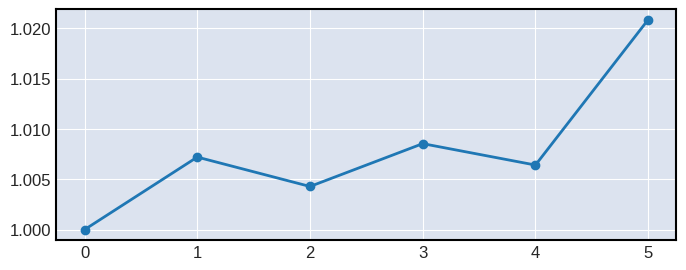

(8, 75.0, 2.01)

In [59]:
# 銘柄選択
ticker = "6758.T" #ソニーグループ
# 期間
start = "2020-01-01"
end = "2023-04-01"
# 短期線（日数）
short_day = 25
# 長期線（日数）
long_day = 50
# シグナル後の経過日数
after_day = 5

sma_gc(ticker, start, end, short_day, long_day, after_day)

[*********************100%***********************]  1 of 1 completed
9983.Tにおけるシグナル発生5日後の上昇回数：34回中14回、上昇確率：41.2%、平均上昇率：-1.33%だった


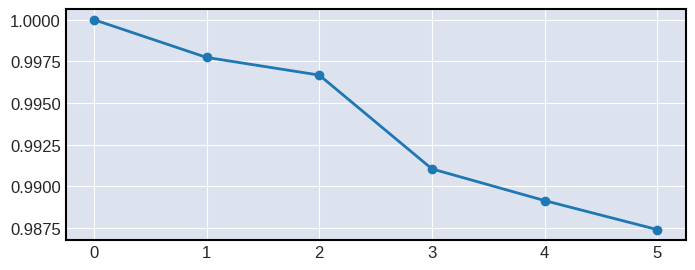

(34, 41.2, -1.33)

In [62]:
# 銘柄選択
ticker = "9983.T" #ファーストリテ(ユニクロさん)
# 期間
start = "2015-05-01"
end = "2023-04-01"
# 短期線（日数）
short_day = 15
# 長期線（日数）
long_day = 30
# シグナル後の経過日数
after_day = 5

sma_gc(ticker, start, end, short_day, long_day, after_day)

### 日経平均に適さなかった25日線と50日線GCに適合する銘柄は？

In [63]:
# 表示方法を変更する
pd.set_option('display.max_rows', None)

[*********************100%***********************]  1 of 1 completed
1518.Tにおけるシグナル発生5日後の上昇回数：9回中2回、上昇確率：22.2%、平均上昇率：-3.12%だった


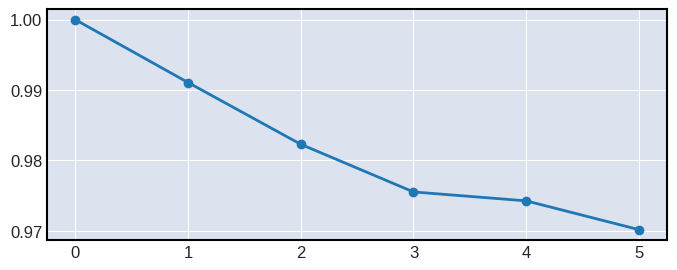

[*********************100%***********************]  1 of 1 completed
6143.Tにおけるシグナル発生5日後の上昇回数：8回中6回、上昇確率：75.0%、平均上昇率：1.24%だった


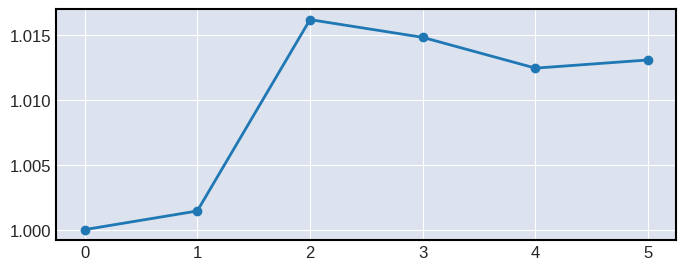

[*********************100%***********************]  1 of 1 completed
9661.Tにおけるシグナル発生5日後の上昇回数：7回中3回、上昇確率：42.9%、平均上昇率：-0.16%だった


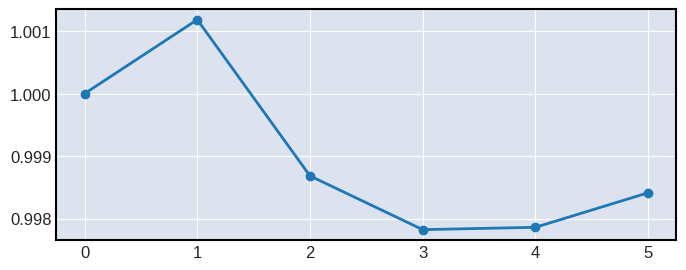

[*********************100%***********************]  1 of 1 completed
4173.Tにおけるシグナル発生5日後の上昇回数：6回中1回、上昇確率：16.7%、平均上昇率：-3.53%だった


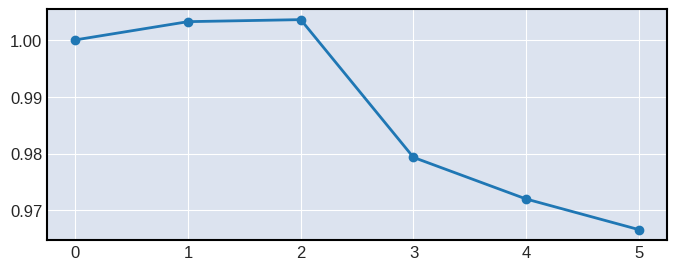

[*********************100%***********************]  1 of 1 completed
7240.Tにおけるシグナル発生5日後の上昇回数：11回中7回、上昇確率：63.6%、平均上昇率：2.86%だった


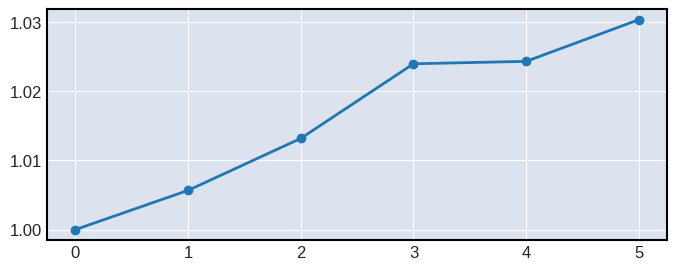

[*********************100%***********************]  1 of 1 completed
2332.Tにおけるシグナル発生5日後の上昇回数：8回中7回、上昇確率：87.5%、平均上昇率：2.26%だった


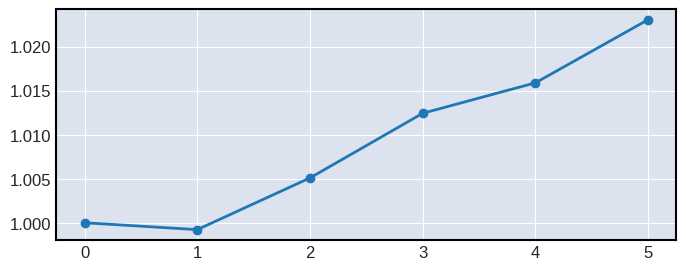

[*********************100%***********************]  1 of 1 completed
3082.Tにおけるシグナル発生5日後の上昇回数：9回中7回、上昇確率：77.8%、平均上昇率：1.51%だった


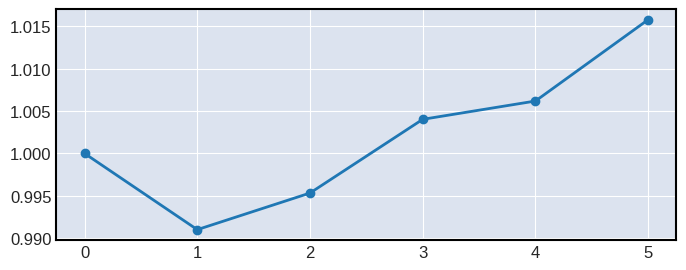

[*********************100%***********************]  1 of 1 completed
1629.Tにおけるシグナル発生5日後の上昇回数：9回中6回、上昇確率：66.7%、平均上昇率：0.75%だった


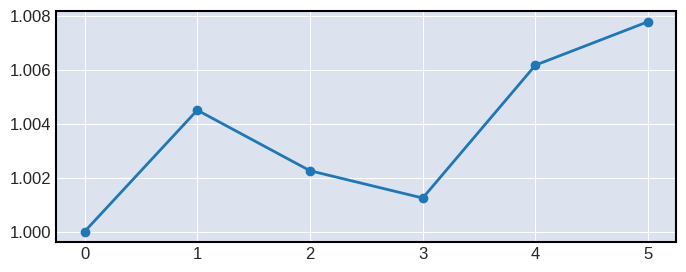

[*********************100%***********************]  1 of 1 completed
7337.Tにおけるシグナル発生5日後の上昇回数：4回中1回、上昇確率：25.0%、平均上昇率：0.67%だった


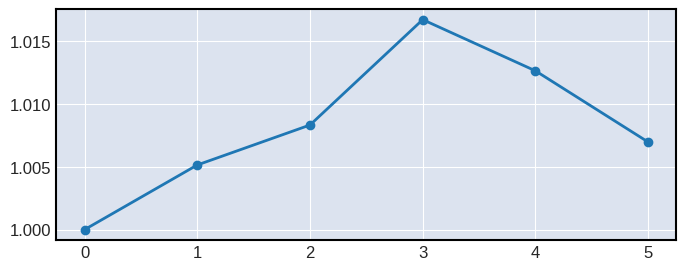

[*********************100%***********************]  1 of 1 completed
2869.Tにおけるシグナル発生5日後の上昇回数：1回中0回、上昇確率：0.0%、平均上昇率：-0.58%だった


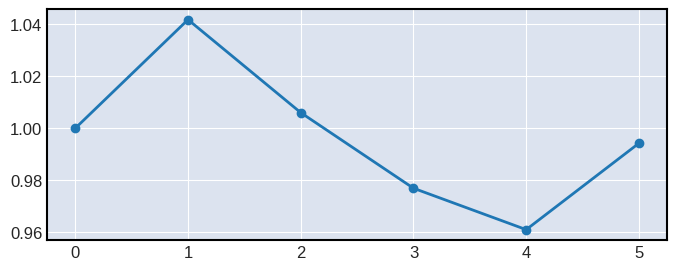

[*********************100%***********************]  1 of 1 completed
8604.Tにおけるシグナル発生5日後の上昇回数：10回中5回、上昇確率：50.0%、平均上昇率：-0.09%だった


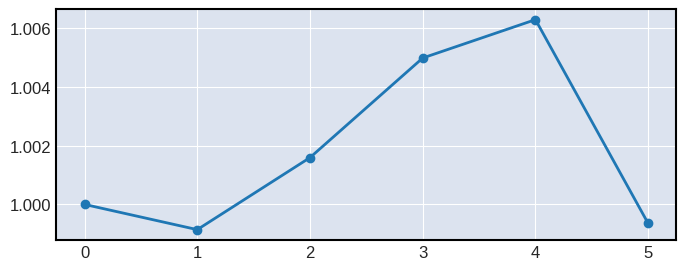

[*********************100%***********************]  1 of 1 completed
7809.Tにおけるシグナル発生5日後の上昇回数：8回中7回、上昇確率：87.5%、平均上昇率：4.19%だった


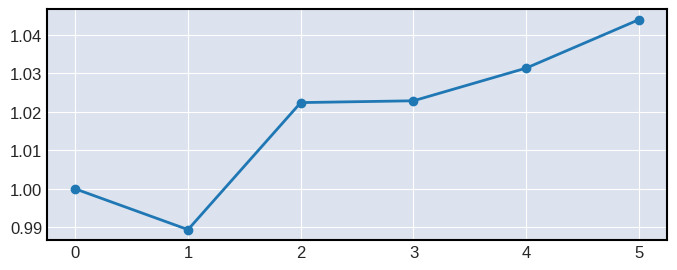

[*********************100%***********************]  1 of 1 completed
9787.Tにおけるシグナル発生5日後の上昇回数：11回中6回、上昇確率：54.5%、平均上昇率：-1.29%だった


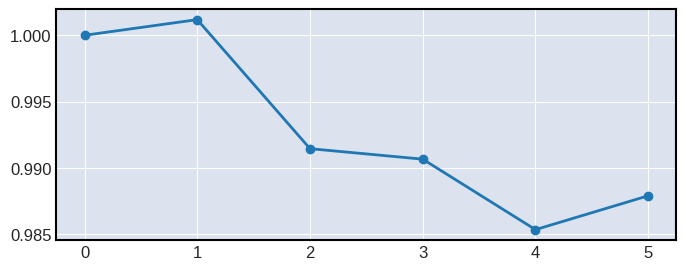

[*********************100%***********************]  1 of 1 completed
3399.Tにおけるシグナル発生5日後の上昇回数：8回中5回、上昇確率：62.5%、平均上昇率：3.37%だった


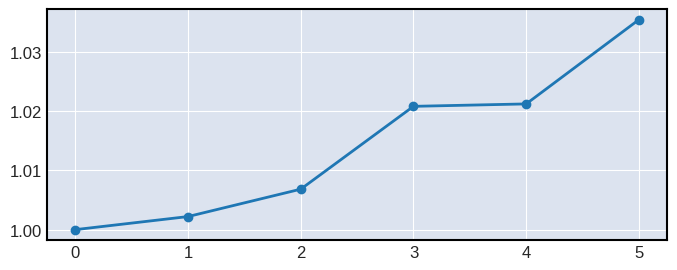

[*********************100%***********************]  1 of 1 completed
2932.Tにおけるシグナル発生5日後の上昇回数：5回中2回、上昇確率：40.0%、平均上昇率：0.42%だった


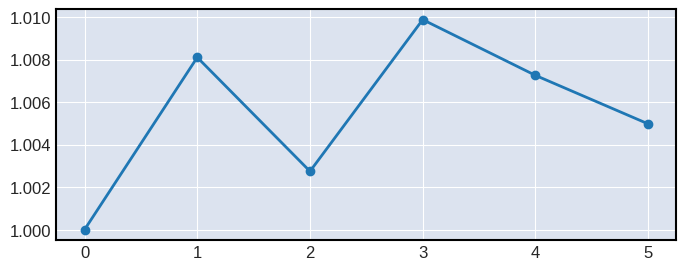

[*********************100%***********************]  1 of 1 completed
9270.Tにおけるシグナル発生5日後の上昇回数：7回中5回、上昇確率：71.4%、平均上昇率：5.07%だった


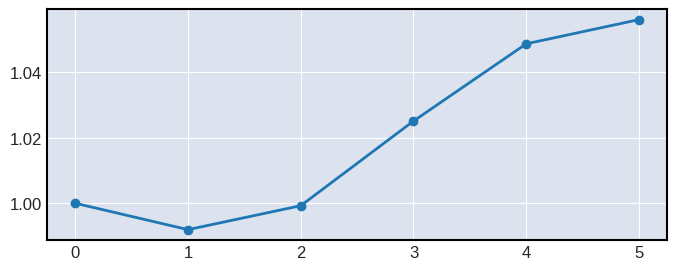

[*********************100%***********************]  1 of 1 completed
3372.Tにおけるシグナル発生5日後の上昇回数：9回中6回、上昇確率：66.7%、平均上昇率：0.95%だった


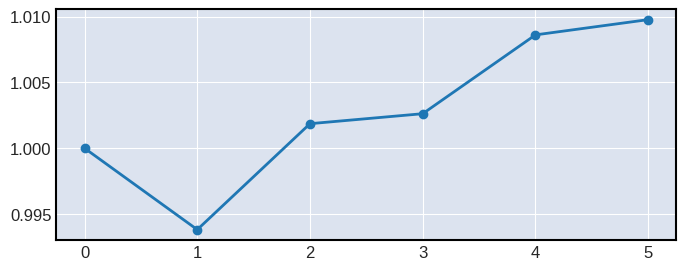

[*********************100%***********************]  1 of 1 completed
3624.Tにおけるシグナル発生5日後の上昇回数：12回中6回、上昇確率：50.0%、平均上昇率：-2.59%だった


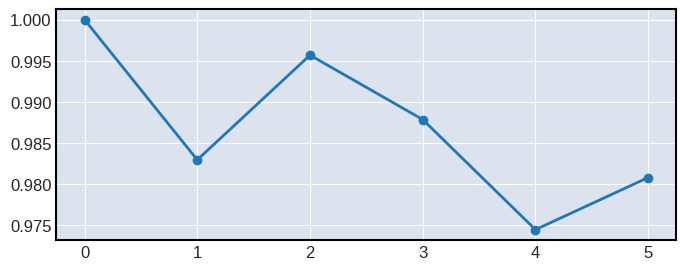

[*********************100%***********************]  1 of 1 completed
2036.Tにおけるシグナル発生5日後の上昇回数：5回中3回、上昇確率：60.0%、平均上昇率：0.19%だった


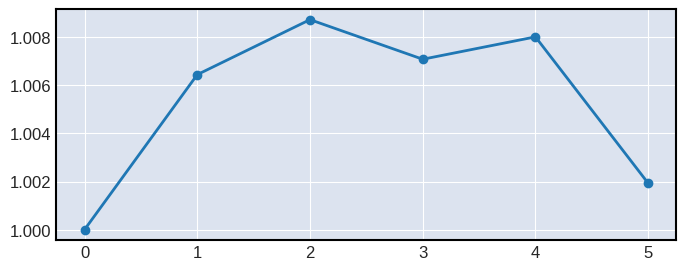

[*********************100%***********************]  1 of 1 completed
4082.Tにおけるシグナル発生5日後の上昇回数：6回中3回、上昇確率：50.0%、平均上昇率：2.16%だった


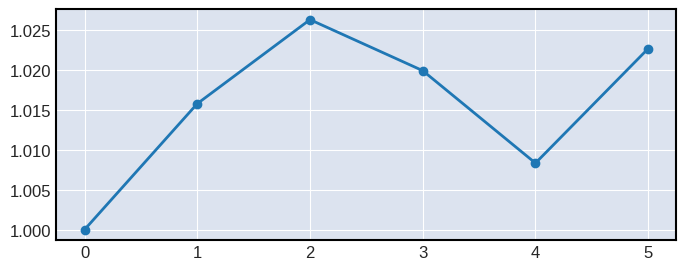

,ticker,total_day,win_count,win_rate_up
0,9270.T,7,71.4,5.07
1,7809.T,8,87.5,4.19
2,3399.T,8,62.5,3.37
3,7240.T,11,63.6,2.86
4,2332.T,8,87.5,2.26
5,4082.T,6,50.0,2.16
6,3082.T,9,77.8,1.51
7,6143.T,8,75.0,1.24
8,3372.T,9,66.7,0.95
9,1629.T,9,66.7,0.75


In [64]:
# 4-2
# 全銘柄を読み込む
stock_code = pd.read_csv('stock_codes.csv')
# 全銘柄から適当なサンプル銘柄(20銘柄)を抽出する。
stock_sample = stock_code.sample(20)
results = []

# 4-1で作成した関数を用いて、全銘柄(今回は20銘柄)のGC適合銘柄を探求。
for i in stock_sample["コード"].values:
    # 条件は日経平均算出時と同じ
    ticker = str(i) + ".T"
    start = '2020-01-01'
    end = '2023-04-01'
    short_span = 25
    long_span = 50
    after_day = 5
    
    # try exceptは銘柄の期間に適さない銘柄はスルーするため。（直近IPO銘柄など）
    try:
        total, win, rate = sma_gc(ticker, start, end, short_span, long_span, after_day)
        result = {'ticker': ticker, 'total_day': total, 'win_count': win, 'win_rate_up': rate}
        results.append(result)
    except:
        continue

ticker_total_return = pd.DataFrame(results)
ticker_total_return.sort_values("win_rate_up", ascending=False).reset_index(drop=True)

#### テクニカルの最適日数を探索しよう！（例：単純移動平均GC）

In [65]:
# 4-3
# 最適なゴールデンクロス日数の組み合わせを模索しよう
def sma_optimize(ticker, start, end, short_day, long_day, after_day):
    # 株価取得
    df = yf.download(ticker, start, end)

    # 移動平均線の期間を変化させながら計算し、勝率が最も高い期間を探す
    win_rates = []
    
    for short in range(short_day, long_day-1):
        for long in range(long_day):
            if long > short:
                try:
                    df[f"sma_{short}"] = ta.SMA(df["Adj Close"], timeperiod=short)
                    df[f"sma_{long}"] = ta.SMA(df["Adj Close"], timeperiod=long)
                    df['sma_sig'] = np.where((df[f"sma_{short}"] > df[f"sma_{long}"]) & (df[f"sma_{short}"].shift() < df[f"sma_{long}"].shift()), 1, 0)

                    df_sma = df[df["sma_sig"]==1][["Adj Close"]]
                    
                    price = []
                    for index in df[df["sma_sig"]==1].index:
                        try:
                            price.append(df.iloc[df.index.get_loc(index) + after_day]["Adj Close"])
                        except IndexError:
                            price.append(np.nan)
                    
                    df_sma["after_Close"] = price                    
                    df_sma["log_profit"] = np.log(df_sma["after_Close"] / df_sma["Adj Close"])

                    total_count = len(df_sma)
                    win_count = sum(df_sma["log_profit"] > 0)
                    win_rate_up = round(np.mean(df_sma["log_profit"]) * 100, 2)
                    
                    if total_count > 0:
                        win_percent = round(win_count / total_count * 100, 1)
                        win_rates.append({"short":short, "long":long, "total_day":total_count, "win_count":win_count, "win_percent":win_percent, "win_rate_up":win_rate_up})
                        
                except:
                    continue
    
    best_df = pd.DataFrame(win_rates).sort_values(by="win_rate_up", ascending=False).reset_index(drop=True)
    print(f'{ticker}のSMAは{best_df["short"][0]}日線と{best_df["long"][0]}日線のゴールデンクロスが最適です。')
    return best_df

In [74]:
# 銘柄選択
ticker = "^N225" 
# 期間
start = "2010-01-01"
end = "2023-04-01"
# 短期線（日数）
short_day = 25
# 長期線（日数）
long_day = 50
# シグナル後の経過日数
after_day = 5
# 10日から50日（長期線>短期線）の場合のみを総当たりさせて、最適な上昇率の組み合わせを探索する
test = sma_optimize(ticker, start, end, short_day, long_day, after_day)
test

[*********************100%***********************]  1 of 1 completed
^N225のSMAは37日線と45日線のゴールデンクロスが最適です。


,short,long,total_day,win_count,win_percent,win_rate_up
0,37,45,55,33,60.0,0.86
1,37,42,73,48,65.8,0.85
2,36,45,52,31,59.6,0.78
3,38,43,72,45,62.5,0.77
4,38,46,53,36,67.9,0.76
5,38,41,97,63,64.9,0.67
6,27,30,104,64,61.5,0.64
7,38,45,56,36,64.3,0.64
8,40,41,150,92,61.3,0.63
9,38,42,82,47,57.3,0.61


上記の関数同様に全てのテクニカルにおいて、最適な日数を探求しましょう！